# Leaving Certificate - Ireland
## Breakdown of candidates by grade awarded in each subject from 2017 to 2020

### Source: State Examinations Commission https://www.examinations.ie/?l=en&mc=st&sc=r16

### Level: A = HIGHER LEVEL, B = FOUNDATION LEVEL, C = COMMON LEVEL, G = ORDINARY LEVEL

In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
years = ['2017','2018','2019','2020']

df = pd.DataFrame()
for year in years:
    file ="Files//" + year + ".xlsx"
    print(f"Reading the file: {file}")
    df = df.append(pd.read_excel(file, usecols=('A:L')))

Reading the file: Files//2017.xlsx
Reading the file: Files//2018.xlsx
Reading the file: Files//2019.xlsx
Reading the file: Files//2020.xlsx


### Let's rename some columns to be easy to interpreted

In [263]:
df.rename(columns = {1: 'H1', 2: 'H2', 3: 'H3', 4: 'H4', 5: 'H5', 6: 'H6', 7: 'H7', 8: 'H8',' Total': 'Total'}, inplace = True)

In [264]:
# Let's use the nomenclature below on column Level
# Level: A = HIGHER LEVEL, B = FOUNDATION LEVEL, C = COMMON LEVEL, G = ORDINARY LEVE
def update_level(level):
    if level == 'A':
        lv = 'Higher'
    elif level == 'B':
        lv = 'Foundation'
    elif level == 'C':
        lv = 'Common'
    elif level == 'G':
        lv = 'Ordinary'      
    else:
        lv = 'Other'
    return lv

df['Level'] = df['Level'].apply(update_level)

In [265]:
df.shape

(274, 12)

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 40
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Subject  274 non-null    object 
 1   Level    274 non-null    object 
 2   Year     274 non-null    int64  
 3   Total    274 non-null    int64  
 4   H1       274 non-null    float64
 5   H2       274 non-null    float64
 6   H3       274 non-null    float64
 7   H4       274 non-null    float64
 8   H5       274 non-null    float64
 9   H6       274 non-null    float64
 10  H7       274 non-null    float64
 11  H8       274 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 27.8+ KB


In [267]:
df.describe()

,Year,Total,H1,H2,H3,H4,H5,H6,H7,H8
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,2018.313869,4145.799270,8.058029,14.809489,19.768613,19.286131,16.683212,10.989781,5.321168,5.087226
std,1.032454,7317.953884,10.609072,8.705241,6.082687,6.706114,6.537394,5.743846,3.558603,5.936330
min,2017.000000,11.000000,0.000000,0.000000,3.200000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,84.000000,1.925000,8.800000,16.200000,15.000000,12.600000,7.725000,2.925000,1.300000
50%,2018.000000,777.000000,4.800000,14.500000,19.900000,20.650000,17.000000,11.400000,4.900000,3.200000
75%,2019.000000,5338.750000,9.800000,18.500000,23.200000,23.950000,20.575000,13.550000,7.175000,6.775000
max,2020.000000,40217.000000,71.600000,46.700000,40.000000,35.100000,37.400000,35.300000,16.700000,40.000000


In [268]:
print(f"Total of subjects available: {len(df['Subject'].unique())}")

Total of subjects available: 47


In [275]:
df[(df['Subject'] == 'ENGLISH') & (df['Level'] == 'Higher')]

,Subject,Level,Year,Total,H1,H2,H3,H4,H5,H6,H7,H8
3,ENGLISH,Higher,2017,38749,2.9,10.7,20.6,26.8,23.3,12.7,2.4,0.6
3,ENGLISH,Higher,2018,38283,2.9,10.0,20.0,27.9,24.2,12.2,2.3,0.5
3,ENGLISH,Higher,2019,40217,2.9,10.0,20.4,27.6,23.8,12.0,2.6,0.6
2,ENGLISH,Higher,2020,294,3.4,10.5,18.4,26.2,20.4,12.6,6.1,2.4


### Observing the values above, we can noticed that there is a pattern in the percentage of grades per Subject.
In English, the *average* of candidates reach the maximun grade (H1) was 3%, following  by\
10% - H2\
20% - H3\
27% - H4\
23% - H5\
12% - H6\
 3% - H7\
 1% - H8

### Let´s check some grades from 2017 to 2020 from Higher Level

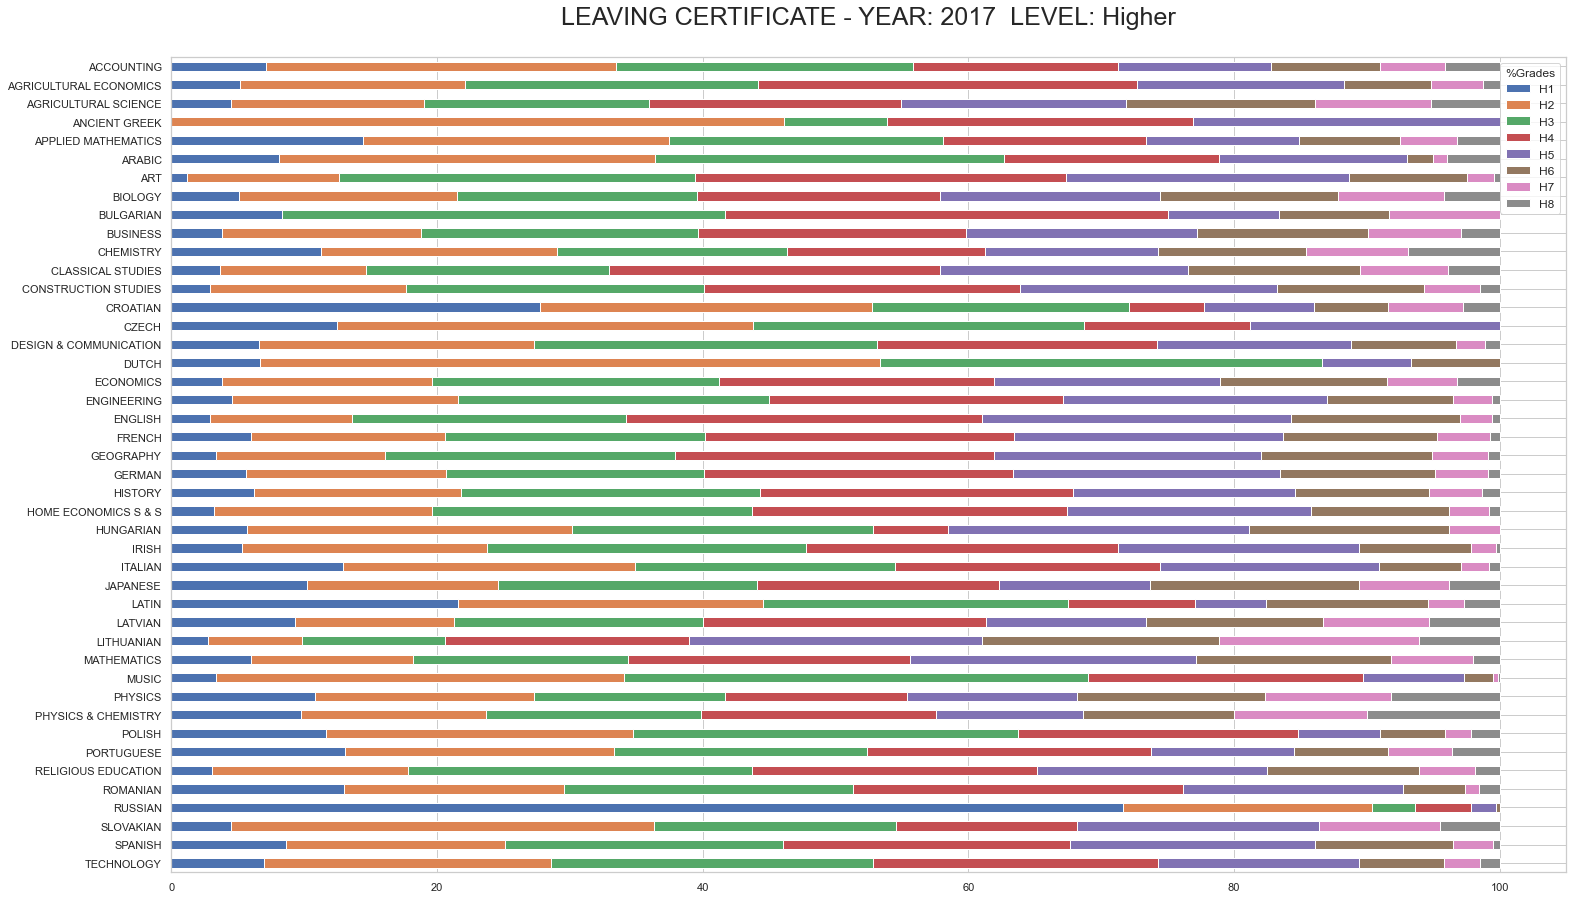

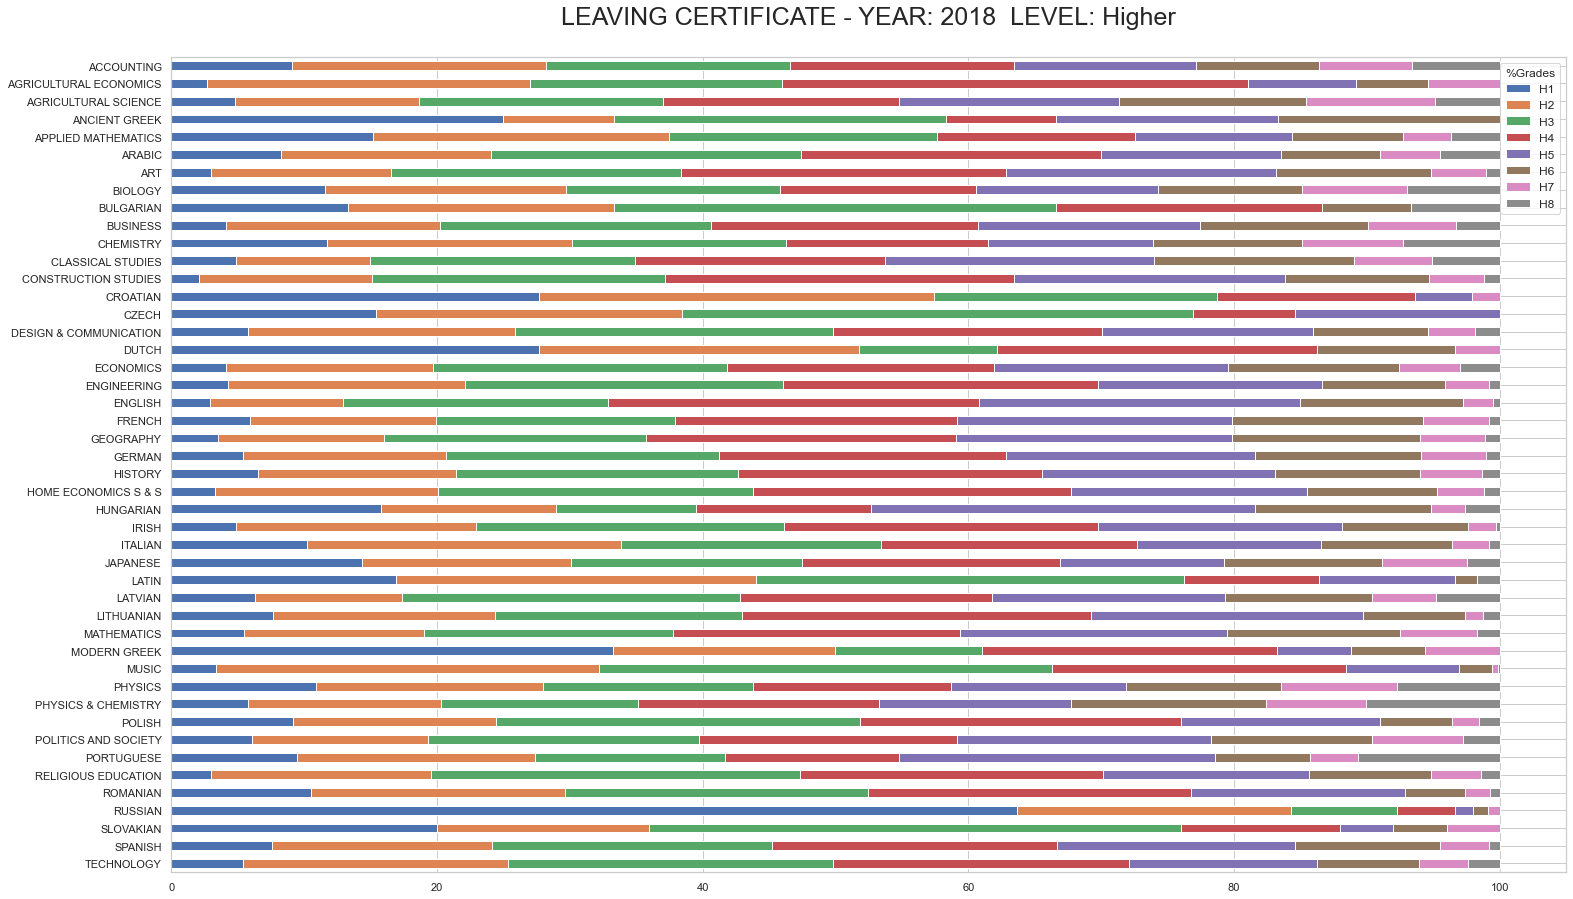

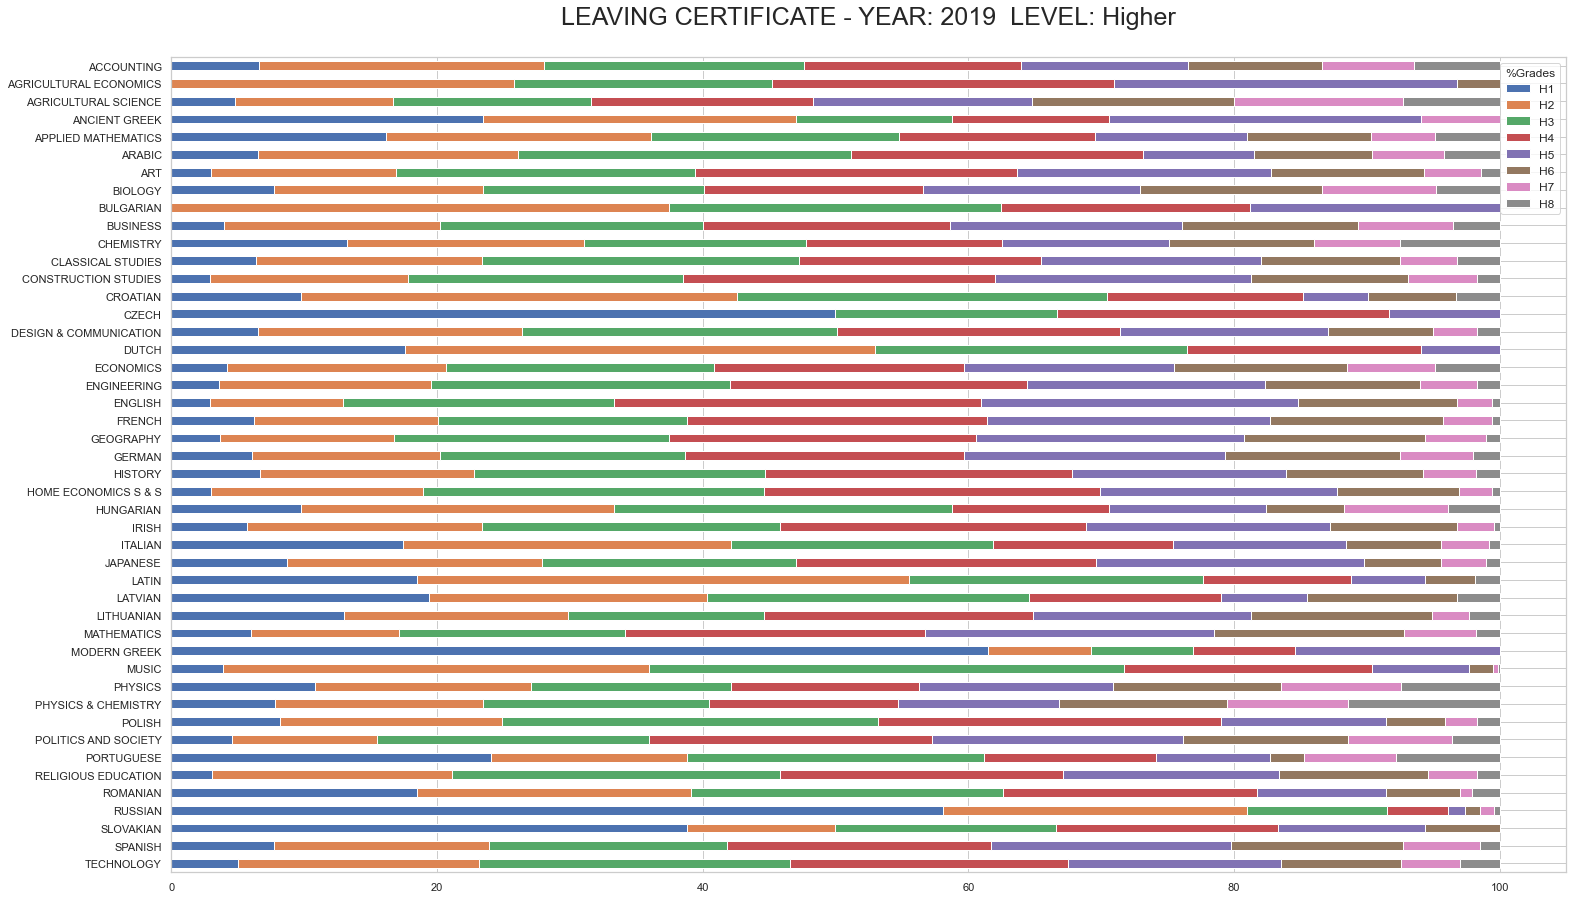

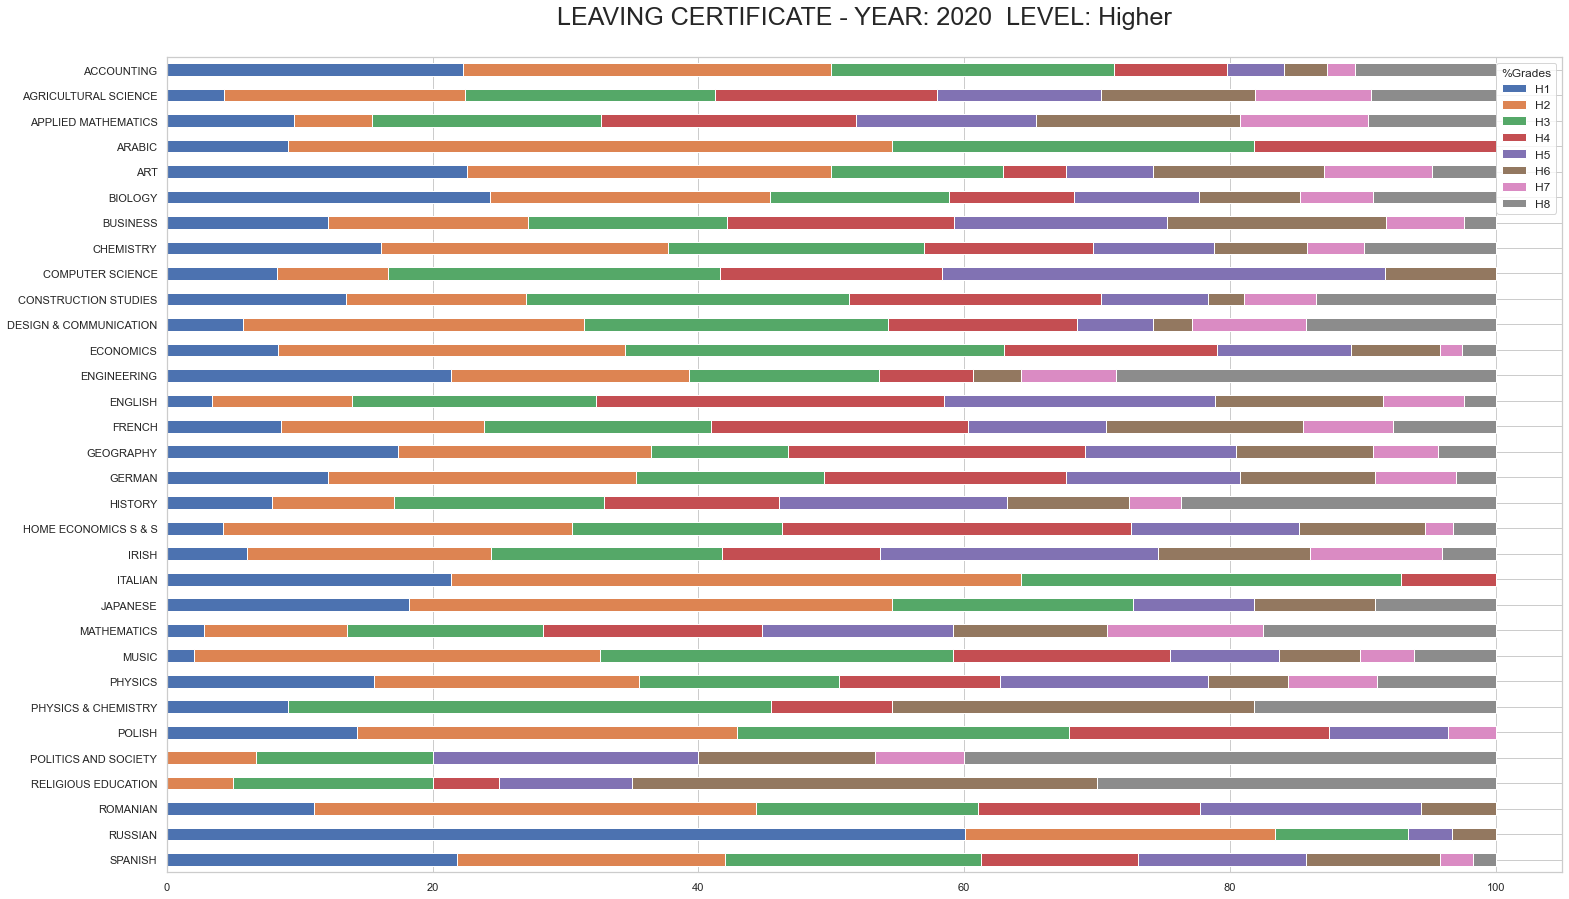

In [270]:
level = 'Higher' 

for year in years: # 2017 to 2020
    year = int(year) 
    df_year_level = df[(df['Year'] == year) & (df['Level'] == level)]
    df_year_level = df_year_level.sort_values(by=['Subject'], ascending=False)
    df_grades = df_year_level[['H1','H2','H3','H4','H5','H6','H7','H8']].apply(lambda x: x*100/sum(x), axis=1)
    df_grades.plot(kind="barh", stacked=True, figsize=(25,15))
    plt.title(f"LEAVING CERTIFICATE - YEAR: {year}  LEVEL: {level}\n",fontsize=25)
    plt.yticks(range(len(df_year_level['Subject'])),df_year_level['Subject'], ha='right')
    plt.legend(title="%Grades", fontsize=12, loc='upper right')
plt.show()                

### Let´s check how many candidates did the mandatory subjects exam Higher level per year 
### *mandatory* subject: English, Mathematics and Irish(citizen)

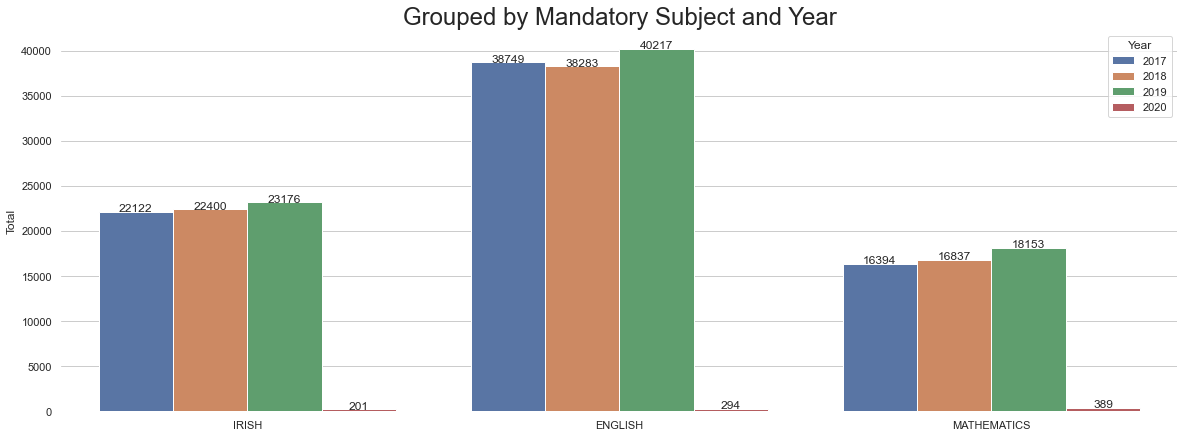

In [277]:
plt.figure(figsize=(20, 7))
sns.set_theme(style="whitegrid")
df_mandatory = df[df['Subject'].isin(['ENGLISH','MATHEMATICS','IRISH']) & (df['Level'] == 'Higher')]
ax=sns.barplot(x='Subject', y='Total', hue='Year', data=df_mandatory)
plt.xlabel("")
plt.title("Grouped by Mandatory Subject and Year", size=24)
sns.despine(left= True, bottom = True)
for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
plt.show()

## Conclusion

The total of candidates that did the mandatory subject between 2017 and 2019 are very similar, except the year of 2020, where the student had the option to get the predicted grades from school and they could choose to do or not the Leaving Certificate(*).

### In 2020 the Leaving Certificate was cancelled due Coronavirus and the number of candidates was extremaly low as you can see in the data above.

(*) Source: https://en.wikipedia.org/wiki/Leaving_Certificate_(Ireland)

"In 2020, the Leaving Certificate was cancelled, due to the COVID-19 pandemic. This would mark the first official cancellation in its existence. Leaving Certificate students were then given the choice of having teachers predict their own students' grades, which will then be nationally standardized. If students are not happy with their predicted grades, however, they can appeal their results and choose to sit a traditional exam in November. The results will not be available in time for the current academic year."

From 47 subjects available on Leaving Certificate, English, Mathematics and Irish(citizen) are mandatory.

Observing the plots, we can say that the Russian Language has the highest number of students who scored maximum (H1), while unlike English, Art and Construction Studies had the lowest number of H1